In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [3]:
# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten the input images
    Dense(128, activation='relu'),      # Hidden layer with ReLU activation
    Dense(10, activation='softmax')     # Output layer with softmax for classification
])

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Compile the model with SGD optimizer and categorical cross-entropy loss
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 11 epochs
history = model.fit(x_train, y_train, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7297 - loss: 1.0547 - val_accuracy: 0.8980 - val_loss: 0.3671
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9008 - loss: 0.3577 - val_accuracy: 0.9165 - val_loss: 0.3011
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9116 - loss: 0.3078 - val_accuracy: 0.9250 - val_loss: 0.2677
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9219 - loss: 0.2782 - val_accuracy: 0.9312 - val_loss: 0.2449
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9310 - loss: 0.2469 - val_accuracy: 0.9361 - val_loss: 0.2266
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9345 - loss: 0.2374 - val_accuracy: 0.9393 - val_loss: 0.2118
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9434 - loss: 0.2075 - val_accuracy: 0.9423 - val_loss: 0.1998
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9450 - loss: 0.1975 - 

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9432 - loss: 0.1859
Test accuracy: 0.9526


In [6]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Convert predictions and true labels to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test

# Generate a classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.94      0.95      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.93      0.94       892
           6       0.95      0.96      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.95      0.93      0.94       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



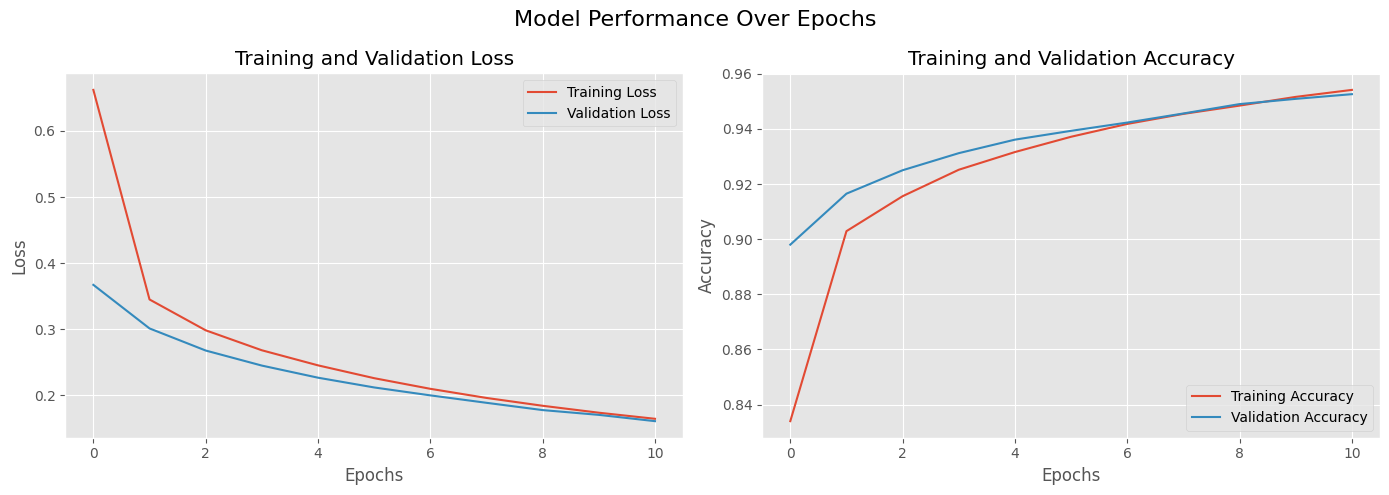

In [7]:
# Plot the training and validation loss and accuracy
plt.style.use("ggplot")  # Use ggplot style for better aesthetics
epochs_range = range(11)  # Number of epochs for x-axis

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
ax1.plot(epochs_range, history.history["loss"], label="Training Loss")
ax1.plot(epochs_range, history.history["val_loss"], label="Validation Loss")
ax1.set_title("Training and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right")

# Plot Accuracy
ax2.plot(epochs_range, history.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs_range, history.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower right")

plt.suptitle("Model Performance Over Epochs", fontsize=16)
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


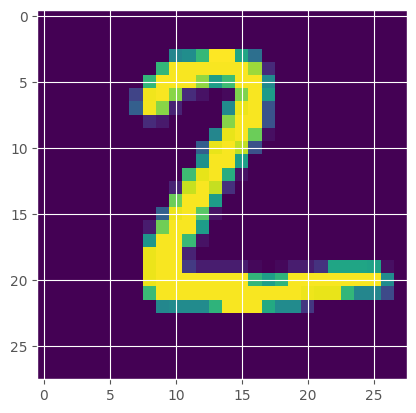

2


In [8]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[1])
plt.show()
print(np.argmax(predicted_value[1], axis=0))